In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plot_anomalies import *
from sklearn.datasets import load_breast_cancer

# Testing iForest on cancer data

In [10]:
# 载入数据
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print(type(cancer))
print(type(X))
print(type(y))
print('data shape: {0};target shape: {1} no. positive: {2}; no. negative: {3}'.format(
    X.shape, y.shape,y[y==1].shape[0], y[y==0].shape[0])) #shape[0]就是读取矩阵第一维度的长度
print(cancer.data[0])  #打印一组样本数据

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
data shape: (569, 30);target shape: (569,) no. positive: 357; no. negative: 212
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [11]:
#df.head(2)
print(len(cancer.feature_names))
cancer.feature_names

30


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
#value_counts()
np.unique(y)

array([0, 1])

There are 212 data points which arw classfied as skin cancer

fit time 0.43s
score time 0.92s
Computed 0.7500 TPR threshold 0.4100 with FPR 0.9953
[[  1 211]
 [ 59 298]]
Proportion anomalies/normal = 357/212 = 168.4%
F1 score 0.6882, avg PR 0.4335


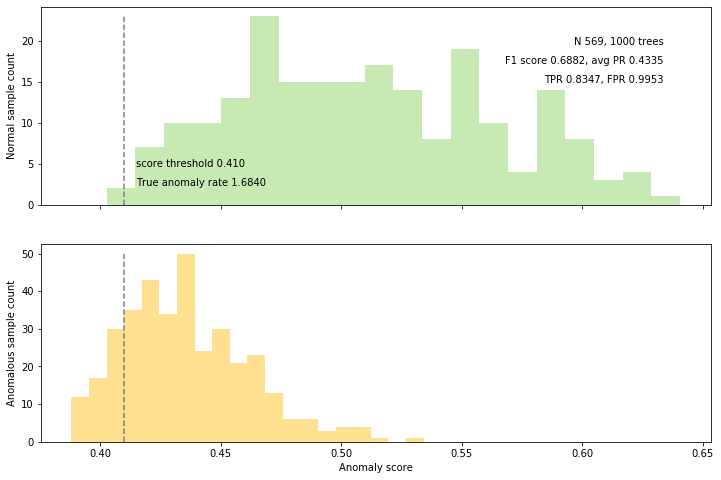

In [14]:
plt.rcParams['figure.figsize'] = [12, 8]
plot_anomalies(X, y, sample_size=5, n_trees=1000, 
               desired_TPR=0.75, improved=True)

I am going to adding noise columns to the DataFrame and test if algorithm is still performs the same.

In [10]:
add_noise(df, 5)
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis,noise_0,noise_1,noise_2,noise_3,noise_4
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.7119,0.2654,0.4601,0.11890,1,-95.160208,163.743008,-46.482249,34.324721,7.560846
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.2416,0.1860,0.2750,0.08902,1,23.689551,66.452605,-183.347463,22.494970,-133.575176


In [11]:
X, y = df.drop('diagnosis', axis=1), df['diagnosis']

fit time 0.30s
score time 1.07s
Computed 0.7500 TPR threshold 0.4700 with FPR 0.1681
[[297  60]
 [ 51 161]]
Proportion anomalies/normal = 212/357 = 59.4%
F1 score 0.7436, avg PR 0.8395


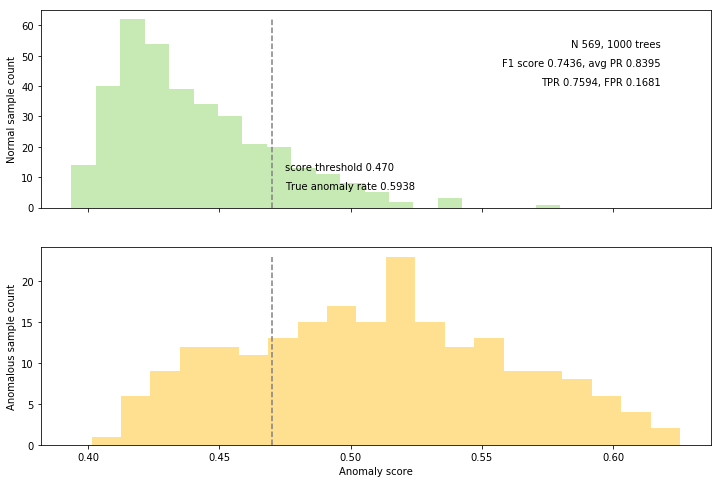

In [12]:
plot_anomalies(X, y, sample_size=5, n_trees=1000, 
               desired_TPR=0.75, improved=True)

I am able to classify cancer diagnosis using my iForest algorithm with F1 score of ~0.74-0.76.